In [43]:
import numpy as np 
import pandas as pd 
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

ModuleNotFoundError: No module named 'cartopy'

In [44]:
# import
atlantic=pd.read_csv('./atlantic.csv', usecols=['ID', 'Date', 'Latitude', 'Longitude', 'Maximum Wind'])
pacific=pd.read_csv('./pacific.csv', usecols=['ID', 'Date', 'Latitude', 'Longitude', 'Maximum Wind'])

In [45]:
# types and trim
atlantic = atlantic.astype({'Date': str})
pacific = pacific.astype({'Date': str})
atlantic['Latitude'] = atlantic.Latitude.str[:-1].astype(float)
atlantic['Longitude'] = atlantic.Longitude.str[:-1].astype(float)
pacific['Latitude'] = pacific.Latitude.str[:-1].astype(float)
pacific['Longitude'] = pacific.Longitude.str[:-1].astype(float)

In [46]:
# group by year and ID with means of Lat, Long and Max Wind for every unique ID
atlantic = atlantic.groupby([atlantic.Date.str[:4], 'ID']).mean().round(2)
pacific = pacific.groupby([pacific.Date.str[:4], 'ID']).mean().round(2)
print(atlantic)
#print(pacific)

               Latitude  Longitude  Maximum Wind
Date ID                                         
1851 AL011851     28.84      97.91         60.71
     AL021851     22.20      97.60         80.00
     AL031851     12.00      60.00         50.00
     AL041851     26.44      72.63         65.10
     AL051851     32.50      73.50         50.00
...                 ...        ...           ...
2015 AL082015     31.87      61.12         36.92
     AL092015     15.37      44.78         24.47
     AL102015     17.90      41.69         31.76
     AL112015     33.25      47.81         59.14
     AL122015     32.99      63.96         53.00

[1816 rows x 3 columns]


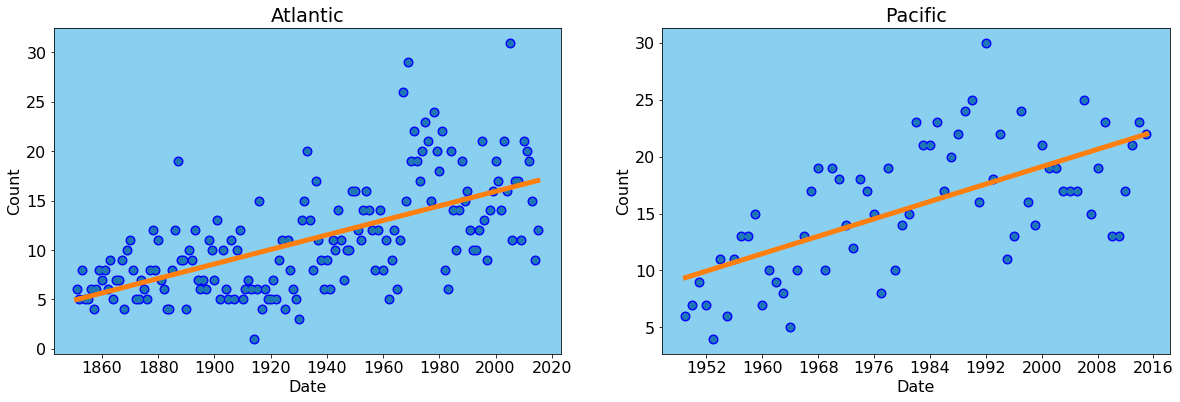

In [47]:
# plot: Hurricane frequency of occurrence by year

# values
atlantic_counts_by_year = atlantic.groupby('Date').size().to_frame('Count').reset_index()
pacific_counts_by_year = pacific.groupby('Date').size().to_frame('Count').reset_index()

# plot configuration
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 16})

# Atlantic
ax = plt.subplot(1,2,1)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Atlantic')
x_values = np.array(atlantic_counts_by_year['Date'].tolist()).astype(np.int)
y_values = atlantic_counts_by_year['Count'].tolist()
x_label = 'Date'
y_label = 'Count'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line, linewidth=5)

# Pacific
ax = plt.subplot(1,2,2)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Pacific')
x_values = np.array(pacific_counts_by_year['Date'].tolist()).astype(np.int)
y_values = pacific_counts_by_year['Count'].tolist()
x_label = 'Date'
y_label = 'Count'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.show()

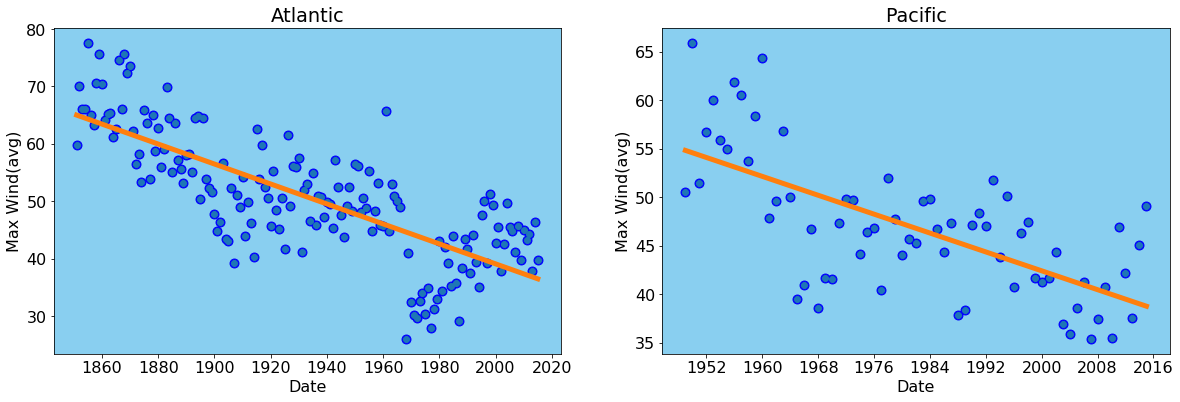

In [48]:
# plot:  Hurricane max wind by year

# values
atlantic_max_wind_by_year = atlantic.groupby('Date').mean().round(2).reset_index().drop([116])
pacific_max_wind_by_year = pacific.groupby('Date').mean().round(2).reset_index()

# plot configuration
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 16})

# Atlantic
ax = plt.subplot(1,2,1)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Atlantic')
x_values = np.array(atlantic_max_wind_by_year['Date'].tolist()).astype(np.int)
y_values = atlantic_max_wind_by_year['Maximum Wind'].tolist()
x_label = 'Date'
y_label = 'Max Wind(avg)'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line, linewidth=5)

# Pacific
ax = plt.subplot(1,2,2)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Pacific')
x_values = np.array(pacific_max_wind_by_year['Date'].tolist()).astype(np.int)
y_values = pacific_max_wind_by_year['Maximum Wind'].tolist()
x_label = 'Date'
y_label = 'Max Wind(avg)'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.show()

In [49]:
# Hurricane location by year (Lat/Lng average)

# values
atlantic_location_avg = atlantic.groupby('Date')['Latitude', 'Longitude'].mean().round(2).reset_index()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

atlantic_lon = atlantic_location_avg['Longitude'][0]
atlantic_lat = atlantic_location_avg['Latitude'][0]
atlantic_lon2 = atlantic_location_avg['Longitude'].iloc[-1]
atlantic_lat2 = atlantic_location_avg['Latitude'].iloc[-1]

plt.plot([atlantic_lon, atlantic_lon2], [atlantic_lat, atlantic_lat2],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([atlantic_lon, atlantic_lon2], [atlantic_lat, atlantic_lat2],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(atlantic_lon + 20, atlantic_lat - 12, '0',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(atlantic_lon2 - 20, atlantic_lat2 - 12, '1',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

NameError: name 'ccrs' is not defined